# 📊 Análisis Exploratorio de Datos: Predictores de Divorcio

## Notebook 00: Carga y Primera Inspección de Datos

**Objetivo:** Cargar el dataset de Predictores de Divorcio desde UCI y realizar una primera inspección de los datos.

**Dataset:** UCI Divorce Predictors
- 170 instancias (86 divorciados, 84 casados)
- 54 atributos basados en la Escala de Medición de Divorcio de Gottman
- Clasificación binaria

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

# Agregar el directorio de scripts al path
sys.path.append('../scripts')

## **Carga de datos**

In [3]:
from load_data import load_divorce_data, get_feature_descriptions

# Cargar datos
df = load_divorce_data(data_path="../data")

ℹ️  El archivo ../data\raw\divorce.csv ya existe, usando versión local

📊 Datos cargados exitosamente!
   - Forma: (170, 55)
   - Columnas: 55
   - Filas: 170
💾 Datos procesados guardados en: ../data\processed\divorce_processed.csv


## **Primera inspección**

In [4]:
# Forma del dataset
print(f"Forma del dataset: {df.shape}")
print(f"Número de características: {df.shape[1] - 1}")
print(f"Número de instancias: {df.shape[0]}")

Forma del dataset: (170, 55)
Número de características: 54
Número de instancias: 170


In [7]:
# Primeras filas
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,0,2,1,0,2,0,2,1,0,1,0,0,0,0,2,2,0,0,0,0,4,1,1,1,1,1,1,2,0,2,2,1,2,3,0,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,2,2,2,3,2,3,3,3,3,2,3,3,3,3,2,3,3,2,2,2,1,2,2,1,1,2,3,2,2,3,3,3,3,4,3,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,4,3,2,3,4,3,2,3,2,1,2,1,1,2,3,3,2,2,2,3,1,1,0,2,2,1,4,4,4,4,4,4,3,2,0,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,2,3,2,3,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,3,0,0,2,1,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,2,2,1,2,3,2,2,2,0,2,2,2,2,4,3,3,1


In [8]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Atr1     170 non-null    int64
 1   Atr2     170 non-null    int64
 2   Atr3     170 non-null    int64
 3   Atr4     170 non-null    int64
 4   Atr5     170 non-null    int64
 5   Atr6     170 non-null    int64
 6   Atr7     170 non-null    int64
 7   Atr8     170 non-null    int64
 8   Atr9     170 non-null    int64
 9   Atr10    170 non-null    int64
 10  Atr11    170 non-null    int64
 11  Atr12    170 non-null    int64
 12  Atr13    170 non-null    int64
 13  Atr14    170 non-null    int64
 14  Atr15    170 non-null    int64
 15  Atr16    170 non-null    int64
 16  Atr17    170 non-null    int64
 17  Atr18    170 non-null    int64
 18  Atr19    170 non-null    int64
 19  Atr20    170 non-null    int64
 20  Atr21    170 non-null    int64
 21  Atr22    170 non-null    int64
 22  Atr23    170 non-null    i

In [9]:
# Tipos de datos
print("Tipos de datos únicos:")
print(df.dtypes.value_counts())

Tipos de datos únicos:
int64    55
Name: count, dtype: int64


## **Valores faltantes**

In [10]:
# Verificar valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje': missing_pct
})

print(f"Total de valores faltantes: {missing.sum()}")
print(f"\nColumnas con valores faltantes:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

Total de valores faltantes: 0

Columnas con valores faltantes:
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje]
Index: []


## **Variable objetivo**

In [11]:
# Distribución de la variable objetivo
print("Distribución de la variable objetivo (Divorce):")
print(df['Divorce'].value_counts())
print(f"\nPorcentaje de divorciados: {df['Divorce'].mean()*100:.2f}%")
print(f"Porcentaje de casados: {(1-df['Divorce'].mean())*100:.2f}%")

Distribución de la variable objetivo (Divorce):
Divorce
0    86
1    84
Name: count, dtype: int64

Porcentaje de divorciados: 49.41%
Porcentaje de casados: 50.59%


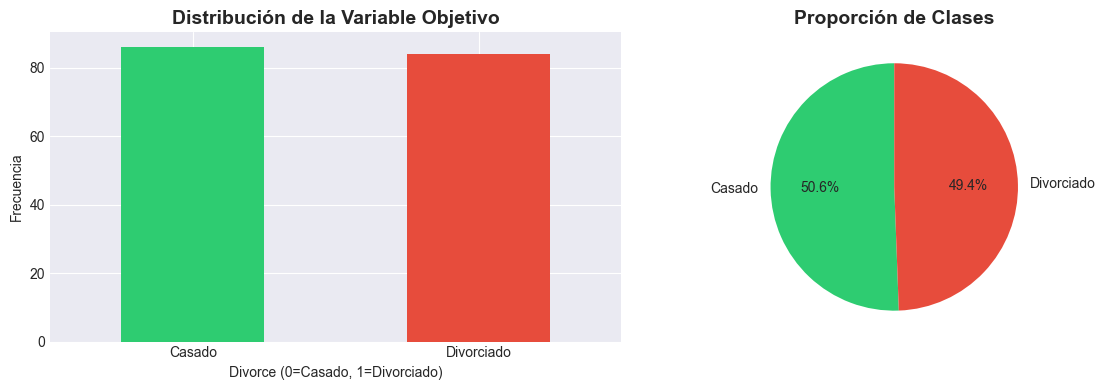

✅ El dataset está balanceado (aproximadamente 50-50)


In [12]:
# Visualización de la distribución
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
df['Divorce'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de la Variable Objetivo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Divorce (0=Casado, 1=Divorciado)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Casado', 'Divorciado'], rotation=0)

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
df['Divorce'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                   labels=['Casado', 'Divorciado'], colors=colors,
                                   startangle=90)
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("✅ El dataset está balanceado (aproximadamente 50-50)")

## **Estadísticas descriptivas**

In [13]:
# Estadísticas descriptivas de todas las características
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Divorce
count,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000,170.000
mean,1.776,1.653,1.765,1.482,1.541,0.747,0.494,1.453,1.459,1.576,1.688,1.653,1.835,1.571,1.571,1.476,1.653,1.518,1.641,1.459,1.388,1.247,1.412,1.512,1.629,1.488,1.400,1.306,1.494,1.494,2.124,2.059,1.806,1.900,1.671,1.606,2.088,1.859,2.088,1.871,1.994,2.159,2.706,1.941,2.459,2.553,2.271,2.741,2.382,2.429,2.476,2.518,2.241,2.012,0.494
std,1.627,1.469,1.415,1.504,1.632,0.904,0.899,1.546,1.558,1.422,1.647,1.469,1.478,1.503,1.507,1.504,1.615,1.566,1.641,1.554,1.452,1.447,1.612,1.504,1.530,1.500,1.457,1.468,1.592,1.504,1.647,1.623,1.785,1.631,1.842,1.798,1.716,1.735,1.719,1.796,1.722,1.574,1.348,1.684,1.500,1.372,1.587,1.137,1.512,1.405,1.260,1.477,1.506,1.668,0.501
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.000,0.000
50%,2.000,2.000,2.000,1.000,1.000,0.000,0.000,1.000,1.000,2.000,1.000,1.500,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,0.500,1.000,1.000,2.000,2.000,1.000,1.000,0.500,0.000,2.000,1.000,2.000,1.500,2.000,2.000,3.000,2.000,3.000,3.000,2.000,3.000,3.000,2.000,3.000,3.000,2.000,2.000,0.000
75%,3.000,3.000,3.000,3.000,3.000,1.000,1.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,1.000
max,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,1.000


In [14]:
# Estadísticas de las características (sin la variable objetivo)
features = df.drop('Divorce', axis=1)
print("Estadísticas de las 54 características:")
print(f"\nMedia general: {features.mean().mean():.3f}")
print(f"Desviación estándar promedio: {features.std().mean():.3f}")
print(f"Valor mínimo en el dataset: {features.min().min():.3f}")
print(f"Valor máximo en el dataset: {features.max().max():.3f}")

Estadísticas de las 54 características:

Media general: 1.784
Desviación estándar promedio: 1.529
Valor mínimo en el dataset: 0.000
Valor máximo en el dataset: 4.000


## **Rangos de valores**

In [15]:
# Verificar valores únicos en las características
print("Valores únicos en las características (escala Likert):")
unique_values = set()
for col in features.columns:
    unique_values.update(df[col].unique())

print(f"Valores únicos encontrados: {sorted(unique_values)}")
print("\nEscala esperada: 0 (Nunca), 1 (Rara vez), 2 (A veces), 3 (Frecuentemente), 4 (Siempre)")

Valores únicos en las características (escala Likert):
Valores únicos encontrados: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Escala esperada: 0 (Nunca), 1 (Rara vez), 2 (A veces), 3 (Frecuentemente), 4 (Siempre)


## **Descripción de características**

In [20]:
# Obtener descripciones de las características
descriptions = get_feature_descriptions()

# Mostrar las primeras 10 características
print("Primeras 10 características del cuestionario:\n")
for i in range(1, 11):
    print(f"Atr{i}: {descriptions[f'Atr{i}']}\n")

Primeras 10 características del cuestionario:

Atr1: Si uno de nosotros se disculpa cuando la discusión es exagerada, la discusión termina.

Atr2: Sé que podemos ignorar nuestras diferencias, incluso si las cosas se ponen difíciles a veces.

Atr3: Cuando necesitamos, podemos tomar nuestras discusiones con mi cónyuge desde el principio y corregirlas.

Atr4: Cuando discuto con mi cónyuge, eventualmente me contactaré con él.

Atr5: El tiempo que paso con mi esposa es especial para nosotros.

Atr6: No tenemos tiempo en casa como pareja.

Atr7: Somos como dos extraños que comparten el mismo entorno en casa en lugar de familia.

Atr8: Disfruto nuestras vacaciones con mi esposa.

Atr9: Disfruto viajar con mi esposa.

Atr10: La mayoría de nuestros objetivos son comunes para mi cónyuge y para mí.



## **Resumen**

In [21]:
print("="*70)
print("RESUMEN DE LA CARGA DE DATOS")
print("="*70)
print(f"✅ Dataset cargado exitosamente")
print(f"✅ {df.shape[0]} instancias con {df.shape[1]-1} características")
print(f"✅ Sin valores faltantes")
print(f"✅ Dataset balanceado (50.6% divorciados, 49.4% casados)")
print(f"✅ Todas las características en escala Likert (0-4)")
print(f"\n📊 Próximos pasos:")
print(f"   1. Análisis univariado de características")
print(f"   2. Análisis bivariado (correlaciones)")
print(f"   3. Análisis multivariado (PCA, clustering)")
print(f"   4. Identificación de características más predictivas")
print("="*70)

RESUMEN DE LA CARGA DE DATOS
✅ Dataset cargado exitosamente
✅ 170 instancias con 54 características
✅ Sin valores faltantes
✅ Dataset balanceado (50.6% divorciados, 49.4% casados)
✅ Todas las características en escala Likert (0-4)

📊 Próximos pasos:
   1. Análisis univariado de características
   2. Análisis bivariado (correlaciones)
   3. Análisis multivariado (PCA, clustering)
   4. Identificación de características más predictivas
